# Progetto di Data Intensive: Predizione della Qualità dei Vini 

### Alfonsi Andrea, Esposto Matteo


## Problema analizzato e obiettivo:

- Lo scopo di questo progetto è cercare di creare un modello in grado di predire la qualità dei vini in base ad alcuni dati ricavati da un test chimico fisico.

- Sarà inoltre interessante vedere quali sono le caratteristiche più determinanti nel ricavo della qualità.


## Dati impiegati e loro struttura:

- Il dataset impiegato si chiama 'Wine Quality Data Set' e include dati sul 'Vino Verde', un vino portoghese originario della provincia storica del Minho nell'estremo nord del paese.

- I dataset presenti sono 2, e includono dati sulle varianti bianche e rosse del 'Vino Verde'.

- I dati derivano da un test fisico chimico effettuato su dei campioni e non includono quindi altre informazioni come il prezzo o il brand del vino.

- Per visualizzare le informazioni sui dati, cominciamo importando i moduli che andremo ad utilizzare.

In [1]:
import numpy as np
import pandas as pd

- Andiamo ora ad importare il dataset attraverso una funzione di pandas, i dati sono separati da un ';' perciò lo dovremo mettere come separatore.
- Come detto i dataset sono 2, quindi saranno salvati in 2 variabili diverse.

In [2]:
white_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep=";")
red_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

- Possiamo adesso vedere il numero di righe e colonne dei 2 dataset

In [3]:
"Vino bianco: {}, Vino Rosso: {}".format(white_data.shape, red_data.shape)


'Vino bianco: (4898, 12), Vino Rosso: (1599, 12)'

- Vediamo ora la lista dei nomi degli elementi contenuti nel file, lavorando inizialmente con il dataset sui vini bianchi

In [4]:
white_data.keys()

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

- Possiamo vedere che gli attributi del dataset sono i seguenti:
    - Acidità fissa
    - Acidità volatile
    - Acido citrico
    - Zucchero residuo
    - Cloruri
    - Biossido di zolfo libero
    - Biossido di zolfo totale
    - Densità
    - ph
    - Solfati
    - Alcol
    - Qualità (valore di output)
     - Voglio stimare il valore di questa variabile in funzione delle altre 

- Il valore della qualità è basato su dati sensoriali (media di almeno 3 valutazioni effettuate da esperti di vini).

- Ogni esperto ha valutato la qualità come valore da 0 (pessima) a 10 (ottima).




In [5]:
white_data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


- Voglio ora sapere quanti vini sono presenti nel dataset per ogni valore della qualità, e voglio rappresentare il risultato attraverso in grafico.
- Andrò quindi ad importare il modulo opportuno.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

- Uso la funzione group by per dividere i dati in base alla qualità e conto il numero di valori per ogni gruppo.

In [7]:
# Data to plot
labels = [x for x in range(white_data['quality'].min(),white_data['quality'].max()+1)]
sizes = white_data.groupby(['quality'])['quality'].count()
sizes

quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64

- In particolare il grafico che mi può più essere utile è il grafico a torta che vado quindi a generare.

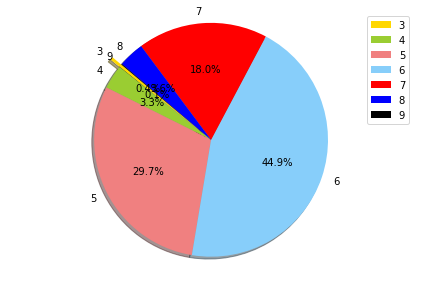

In [8]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','blue','black']
explode = (0.1, 0, 0, 0,0,0,0)  # explode 1st slice
 
#Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

- Come è possibile vedere il 90% circa dei vini del dataset è di qualità 5, 6 o 7. 
- Non ci sono vini con qualità inferiore al 3 nè con qualità 10.

## Metodo risolutivo e Risultati

- Il metodo usato è quello della <b>Regressione Lineare Multivariata</b>, dove cioè una variabile dipendente è stimata su n variabili indipendenti. 

- Un insieme di m osservazioni su cui addestrare il modello può essere rappresentato da
 - una matrice X con m x n valori delle variabili indipendenti
 - un vettore y con i corrispondenti m valori noti della variabile dipendente

- Devo quindi estrarre dal DataSet la matrice X e il vettore y

- y è dato dalla colonna 'quality' 

In [9]:
y = white_data['quality']

- X è dato dall'intero DataSet ad eclusione della colonna 'quality'

In [10]:
X = white_data.drop(columns=['quality'])

- Ora vado ad implementare la funzione della discesa del gradiente per la regressione lineare multivariata

In [11]:
def lin_reg_gd(X, y, N=50, step_size=0.000001):
    # estraggo numero di osservazioni e di feature
    m, n = X.shape
    # creo copia di X con aggiunta una colonna di 1
    # (hstack concatena matrici orizzontalmente)
    X1 = np.hstack([np.ones((m, 1)), X])
    # inizializzo vettore parametri a zero
    theta = np.zeros(n+1)
    for it in range(N):
        # calcolo l'errore su ciascuna osservazione
        error = X1.dot(theta) - y
        # calcolo il gradiente
        grad = 2 / m * (X1.T.dot(error))
        # aggiorno il vettore dei parametri
        theta -= step_size * grad
    return theta

- Eseguo la funzione per ottenere un vettore di parametri del modello

In [12]:
theta=lin_reg_gd(X, y)

- Posso ora, per esempio, calcolare il valore della qualità sulla prima riga di X

In [13]:
sample=X.iloc[0]
theta[0]+theta[1:].dot(sample)

5.921395002109202

- Ed ora lo posso confrontare con il valore reale

In [14]:
y[0]

6

### Funzione dell'errore
- Posso calcolare l'errore quadratico medio di cui è stato calcolato il gradiente precedentemente tramite questa funzione

In [15]:
def mse(X, y, theta):
    m, n = X.shape
    X1 = np.hstack([np.ones((m, 1)), X])
    return ((X1.dot(theta) - y) ** 2).mean()

- Possiamo ora visualizzare l'andamento dell'errore in base al numero di iterazioni

In [16]:
error_prog = np.array([mse(X, y, lin_reg_gd(X, y, N)) for N in range(30)])
error_prog

array([35.33401388, 32.59239413, 30.09209378, 27.81186966, 25.73234861,
       23.83586288, 22.10630001, 20.52896589, 19.09045995, 17.77856123,
       16.58212459, 15.49098599, 14.49587612, 13.58834163, 12.76067334,
       12.00584067, 11.31743197, 10.68959997, 10.11701216,  9.59480543,
        9.11854478,  8.68418559,  8.28803932,  7.92674212,  7.59722624,
        7.296694  ,  7.022594  ,  6.77259942,  6.54458828,  6.33662541])

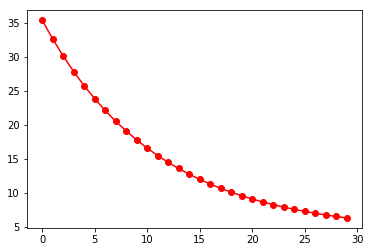

In [17]:
plt.plot(error_prog, "ro-")

- Applichiamo una scala logaritmica per visualizzare meglio l'andamento per valori piccoli

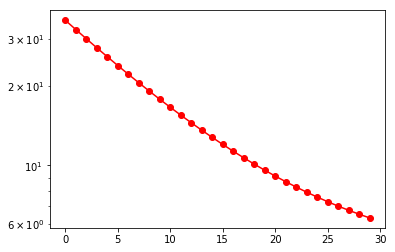

In [18]:
plt.semilogy(error_prog, "ro-")

- Importo ora il modulo 'sklearn' in quanto offre diverse funzioni per l'addestramento e l'uso di modelli 

In [19]:
import sklearn

- A questo punto divido i dati a disposizione per poter costruire il modello in:
    - un training set su cui il modello è effettivamente addestrato, minimizzandone l'errore
    - un validation set su cui verificare l'errore del modello
    
- Per fare questo uso la funzione 'train_test_split' di scikit-learn

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=0.3, random_state=44)

- Per addestrare un modello di regressione devo prima creare un modello vuoto

In [21]:
from sklearn.linear_model import LinearRegression
lrm = LinearRegression()

- Userò quindi il metodo fit per addestrarlo sui dati del training set

In [22]:
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

- Posso ora vedere il coefficiente angolare e l'intercetta del modello addestrato

In [23]:
lrm.coef_

array([ 6.27664859e-02, -1.75417474e+00,  1.39334114e-02,  7.27471076e-02,
       -1.98435691e-01,  4.68620252e-03, -7.86781341e-04, -1.30370598e+02,
        6.08570333e-01,  5.45873321e-01,  2.14629308e-01])

In [24]:
lrm.intercept_

130.54741272724394

- Mi è ora possibile capire come le varie caratteristiche influiscano sul valore della qualità
- Per farlo posso associare ad ogni coefficiente angolare il nome della variabile corrispondente

In [25]:
pd.Series(lrm.coef_, index=X.columns)

fixed acidity             0.062766
volatile acidity         -1.754175
citric acid               0.013933
residual sugar            0.072747
chlorides                -0.198436
free sulfur dioxide       0.004686
total sulfur dioxide     -0.000787
density                -130.370598
pH                        0.608570
sulphates                 0.545873
alcohol                   0.214629
dtype: float64

- Da questa operazione è facile vedere come la densità sia la caratteristica più influente nella valutazione della qualità dei vini
- Vado quindi ad approfondire questa informazione, cercando la densità media per ogni qualità

In [26]:
g = white_data.groupby('quality')
mean_labels  = g['density'].mean()
print(mean_labels)

quality
3    0.994884
4    0.994277
5    0.995263
6    0.993961
7    0.992452
8    0.992236
9    0.991460
Name: density, dtype: float64


- Posso anche vedere la variazione della densità attraverso un grafico

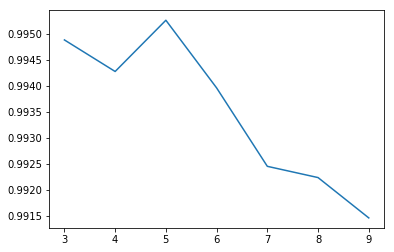

In [27]:
min_x=white_data['quality'].min()
max_x=white_data['quality'].max()
min_y=white_data['density'].min()
max_y=white_data['density'].max()

fig = plt.figure()
ax = plt.axes()

x = np.linspace(min_x,max_x,len(mean_labels))
ax.plot(x, mean_labels);

- Si vede bene come la qualità migliori al diminuire della densità. L'unica eccezione è nelle qualità '3 e 4', ma questo è probabilmente dovuto al ristretto numero di dati per quelle qualità

- Come abbiamo visto in precedenza il secondo dato più influente è l'acidità volatile, perciò andiamo a verificare come varia rispetto alla qualità.

In [28]:
g = white_data.groupby('quality')
mean_labels  = g['volatile acidity'].mean()
print(mean_labels)

quality
3    0.333250
4    0.381227
5    0.302011
6    0.260564
7    0.262767
8    0.277400
9    0.298000
Name: volatile acidity, dtype: float64


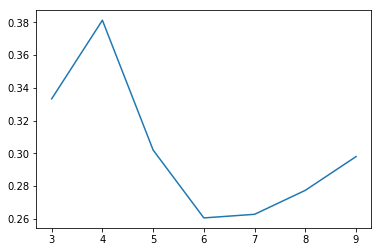

In [29]:
min_x=white_data['quality'].min()
max_x=white_data['quality'].max()
min_y=white_data['density'].min()
max_y=white_data['density'].max()

fig = plt.figure()
ax = plt.axes()

x = np.linspace(min_x,max_x,len(mean_labels))
ax.plot(x, mean_labels);

### Ottenere Predizioni dal Modello
- Il metodo predict, dopo avergli passato un set di variabili indipendenti, permette di ottenere i valori della variabile dipendente corrispondenti previsti dal modello
- Facciamo una prova con alcuni valori del training set

In [30]:
pred_train = lrm.predict(X_train)
pred_train[:5]

array([5.70574246, 5.93763075, 6.103053  , ..., 5.67380343, 5.62644939,
       5.97754512])

- Ottengo le predizioni anche per il validation set

In [31]:
pred_val = lrm.predict(X_val)
pred_val[:5]

array([5.8049428 , 6.29654425, 5.72320663, 5.79302498, 5.5818338 ])

### Calcolo dell'Errore del Modello
- Possiamo confrontare i risultati dati dal modello con i dati effettivi per vedere l'errore compiuto dal modello
- Andiamo a calcolare l'errore quadratico medio sui dati di training, che è stato minimizzato dal modello

In [32]:
((pred_train - y_train)**2).mean()

0.563186940527614

- errore quadratico medio sul validation set 

In [33]:
((pred_val - y_val)**2).mean()

0.5650853099177966

- Errore relativo medio sul training set

In [34]:
((pred_train - y_train) / y_train).abs().mean()

0.10271345311718677

- Errore relativo medio sul validation set

In [35]:
((pred_val - y_val) / y_val).abs().mean()

0.10420592013534366

### Confronto con il Vino Rosso

- Andiamo ora a prendere i dati sul vino rosso e vediamo se i risultati sono simili

In [36]:
# Data to plot
labels = [x for x in range(red_data['quality'].min(),red_data['quality'].max()+1)]
sizes = red_data.groupby(['quality'])['quality'].count()
sizes

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

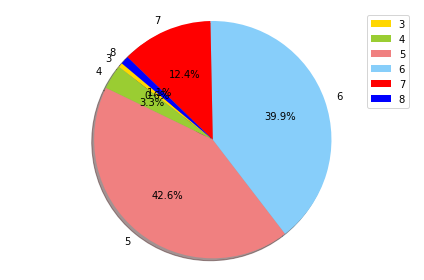

In [37]:
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','red','blue','black']
 
#Plot
plt.pie(sizes,  labels=labels, colors=colors,autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels, loc="best")
plt.axis('equal')
plt.tight_layout()
plt.show()

- Innanzitutto è possibile vedere che i dati raccolti hanno percentuali di qualità diverse, per esempio i vini con qualità 5 sono qui molto più presenti

In [38]:
y = red_data['quality']
X = red_data.drop(columns=['quality'])

theta=lin_reg_gd(X, y)

In [39]:
error_prog = np.array([mse(X, y, lin_reg_gd(X, y, N)) for N in range(30)])

In [40]:
error_prog

array([32.41651032, 32.09638622, 31.78090062, 31.46998569, 31.16357459,
       30.86160147, 30.56400142, 30.27071052, 29.98166574, 29.696805  ,
       29.41606711, 29.13939179, 28.86671964, 28.59799212, 28.33315155,
       28.0721411 , 27.81490476, 27.56138735, 27.31153448, 27.06529258,
       26.82260885, 26.58343125, 26.34770853, 26.11539017, 25.88642639,
       25.66076813, 25.43836708, 25.2191756 , 25.00314677, 24.79023434])

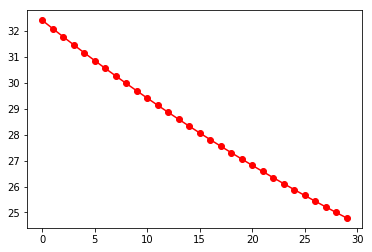

In [41]:
plt.plot(error_prog, "ro-")

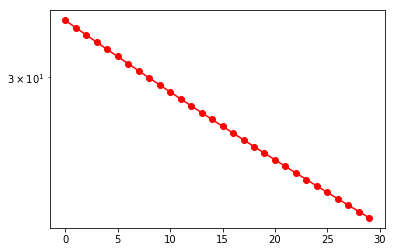

In [42]:
plt.semilogy(error_prog, "ro-")

In [43]:
X_train, X_val, y_train, y_val = \
    train_test_split(X, y, test_size=0.3, random_state=44)
lrm = LinearRegression()
lrm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [44]:
lrm.coef_

array([-2.68572039e-02, -9.74124240e-01, -6.54307700e-02,  2.92549234e-03,
       -2.28135632e+00,  5.70040564e-03, -3.65279758e-03,  1.71288343e+01,
       -6.65677305e-01,  1.02435078e+00,  3.03906242e-01])

In [45]:
lrm.intercept_

-12.033472335075007

In [46]:
pd.Series(lrm.coef_, index=X.columns)

fixed acidity           -0.026857
volatile acidity        -0.974124
citric acid             -0.065431
residual sugar           0.002925
chlorides               -2.281356
free sulfur dioxide      0.005700
total sulfur dioxide    -0.003653
density                 17.128834
pH                      -0.665677
sulphates                1.024351
alcohol                  0.303906
dtype: float64

In [47]:
g = red_data.groupby('quality')
mean_labels  = g['density'].mean()
print(mean_labels)

quality
3    0.997464
4    0.996542
5    0.997104
6    0.996615
7    0.996104
8    0.995212
Name: density, dtype: float64


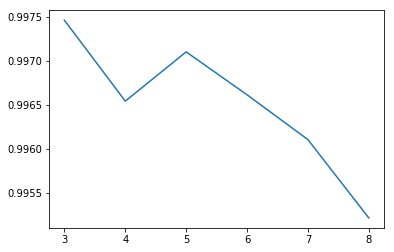

In [48]:
min_x=red_data['quality'].min()
max_x=red_data['quality'].max()
min_y=red_data['density'].min()
max_y=red_data['density'].max()

fig = plt.figure()
ax = plt.axes()

x = np.linspace(min_x,max_x,len(mean_labels))
ax.plot(x, mean_labels);

- Anche con i vini rossi, la qualità aumenta al diminuire della densità

In [49]:
pred_train = lrm.predict(X_train)
pred_val = lrm.predict(X_val)

- Vediamo ora in ordine l'errore quadratico medio sui dati di training, l'errore quadratico medio sul validation set, l'errore relativo medio sul training set e l'errore relativo medio sul validation set

In [50]:
((pred_train - y_train)**2).mean()

0.4013157743905628

In [51]:
((pred_val - y_val)**2).mean()

0.45914975941796654

In [52]:
((pred_train - y_train) / y_train).abs().mean()

0.09021633138574825

In [53]:
((pred_val - y_val) / y_val).abs().mean()

0.09683441332434671

- Rispetto ai dati degli errori sul vino bianco, questi sono tutti più piccoli

## Conclusioni e Configurazione per applicazione web

- In conclusione, questo progetto ha permesso la creazione di un modello in grado di ricavare il livello di qualità dei vini con una percentuale di errore molto bassa
- E' stato inoltre interessante vedere come i vari attributi incidano sul ricavo del suo valore

- Per far funzionare la web app è necessario spostare la cartella WebApp nel percorso dell'ambiente virtuale e attivare l'ambiente virtuale.
- A questo punto va configurata in una variabile d'ambiente FLASK_APP il nome del file
 - export FLASK_APP=webapp.py (in Linux e Mac OS X)
 - set FLASK_APP=webapp.py (in Windows)
- Si può quindi eseguire l'applicazione lanciando dalla directory dell'applicazione il comando: flask run
- L'applicazione contiene un form in cui inserire le informazioni del vino di cui si deve predire la qualità. Premendo il pulsante sotto il form verrà trovata la qualità
- Sotto sono presenti alcuni link relativi potenzialmente utili per un ipotetico utente
- Per far funzionare l'applicazione sono necessari i moduli numpy, pandas, flask e sklearn

- Citazione richiesta per l'uso del DataSet:<br/>
<i>P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. <br/>
Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.</i>
- Link al DataSet: https://archive.ics.uci.edu/ml/datasets/Wine+Quality